In [42]:
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

def matvec(matrix, vector):
    result = np.zeros(vector.shape)
    for i in range(matrix.shape[0]):
        for j in range(vector.shape[0]):
            result[i] += matrix[i, j] * vector[j]
    return result    
    
def profile_matvec(NROWS):
    times = []
    for nrows in NROWS:
        vector = np.random.rand(nrows, nrows)
        matrix = np.random.rand(nrows, nrows)
        start = time()
        y = matvec(matrix, vector)
        end = time()
        times.append((end - start) * 1e6)  # Convert to microseconds
    return times

NROWS = [10, 100, 200, 300, 500, 800, 1000]
times = profile_matvec(NROWS)

df_py = pd.DataFrame({'NROWS': NROWS, 'Time': times})
df_py

,NROWS,Time
0,10,1.804829e+02
1,100,1.505947e+04
2,200,6.456804e+04
3,300,1.487119e+05
4,500,4.290087e+05
5,800,1.266736e+06
6,1000,2.114295e+06


Polynomial Fit Equation: Poly(2.58043722015003*x**2 - 441.756993233668*x + 28894.3877634341, x, domain='RR')


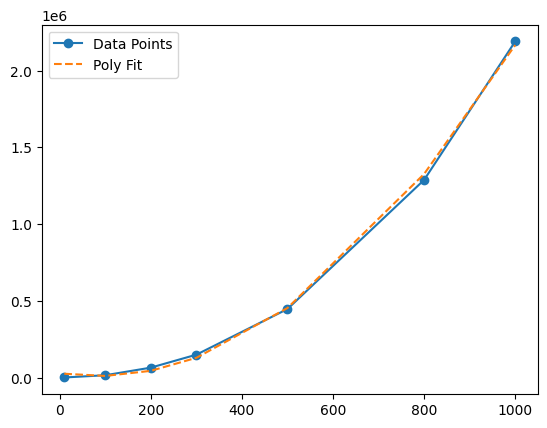

In [41]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def plot_polynomial_fit(df):
    # Fit a polynomial to the data
    coefficients = np.polyfit(df['NROWS'], df['Time'], 2)
    poly = np.poly1d(coefficients)

    # Show the polynomial fit equation
    x = sp.Symbol('x')
    poly_equation = sp.Poly(poly(x), x)
    print(f"Polynomial Fit Equation: {poly_equation}")

    # Plot the data points
    plt.plot(df['NROWS'], df['Time'], marker='o', label='Data Points')

    # Plot the polynomial fit, dashed line
    plt.plot(df['NROWS'], poly(df['NROWS']), label='Poly Fit', linestyle='--')

    plt.legend()
    plt.show()

plot_polynomial_fit(df_py)


In [44]:
!make run

./matvec
NROWS,Time
10,0
100,6
200,25
300,60
500,167
800,438
1000,1428
2000,2869
5000,17940
10000,78211
15000,167315
20000,295148
25000,467428
30000,663821
Results written to output.txt


Polynomial Fit Equation: Poly(0.000729463887539309*x**2 + 0.303842863548565*x - 176.3181052003, x, domain='RR')


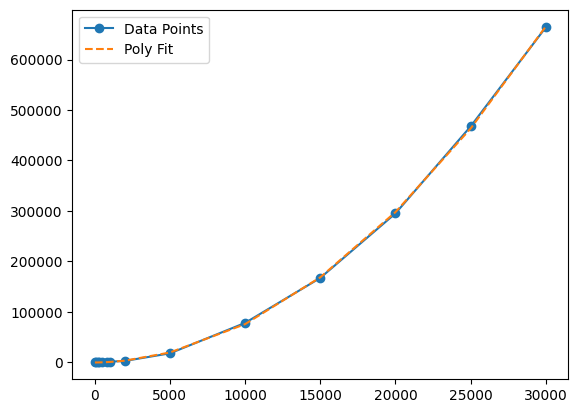

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the output file
df_cpp = pd.read_csv('output.txt')
df_cpp.head()

plot_polynomial_fit(df_cpp)


In [48]:
df_merged = pd.merge(df_py, df_cpp, on='NROWS', suffixes=['_py', '_cpp'])
df_merged['speedup'] = df_merged['Time_py'] / df_merged['Time_cpp']
df_merged

,NROWS,Time_py,Time_cpp,speedup
0,10,1.804829e+02,0,inf
1,100,1.505947e+04,6,2509.911855
2,200,6.456804e+04,25,2582.721710
3,300,1.487119e+05,60,2478.531996
4,500,4.290087e+05,167,2568.914505
5,800,1.266736e+06,438,2892.090850
6,1000,2.114295e+06,1428,1480.598410


In [50]:
def matvec_numpy(NROWS):
    times = []
    for nrows in NROWS:
        vector = np.random.rand(nrows, nrows)
        matrix = np.random.rand(nrows, nrows)
        start = time()
        y = matrix @ vector
        end = time()
        times.append((end - start) * 1e6)  # Convert to microseconds
    return times

NROWS = [10, 100, 200, 300, 500, 800, 1000, 2000, 5000]
times = matvec_numpy(NROWS)
df_np = pd.DataFrame({'NROWS': NROWS, 'Time': times})
df_np


,NROWS,Time
0,10,3.051758e+01
1,100,8.559227e+01
2,200,8.905888e+03
3,300,2.193022e+04
4,500,1.558161e+04
5,800,4.143929e+04
6,1000,5.674529e+04
7,2000,9.715033e+04
8,5000,1.012221e+06


In [51]:
df_merged_np = pd.merge(df_np, df_cpp, on='NROWS', suffixes=['_np', '_cpp'])
df_merged_np['speedup'] = df_merged_np['Time_np'] / df_merged_np['Time_cpp']
df_merged_np


,NROWS,Time_np,Time_cpp,speedup
0,10,3.051758e+01,0,inf
1,100,8.559227e+01,6,14.265378
2,200,8.905888e+03,25,356.235504
3,300,2.193022e+04,60,365.503629
4,500,1.558161e+04,167,93.303041
5,800,4.143929e+04,438,94.610262
6,1000,5.674529e+04,1428,39.737599
7,2000,9.715033e+04,2869,33.862086
8,5000,1.012221e+06,17940,56.422554
